In [1]:
from __future__ import print_function
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import os
from keras.models import model_from_yaml
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [3]:
test_path = '../test-jpg/'
test_count = len(os.listdir(test_path))
norm = [103.939, 116.779, 123.68]
yaml_file = open('../model.yaml', 'r')
load_model = yaml_file.read()
yaml_file.close()
model = model_from_yaml(load_model)
model.load_weights('../checkpoints/weights.hdf5')

partly_cloudy
primary


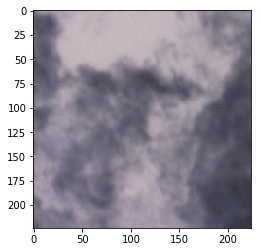

In [15]:
img_resize = (224,224)
rand_id = np.random.randint(8, size = 1)
img = Image.open(os.path.join(test_path,'test_'+str(rand_id[0])+'.jpg'))
img.thumbnail(img_resize)
img_array = np.asarray(img.convert("RGB"), dtype=np.float32)
imshow(img_array)

for ch in range(img_array.shape[2]):
    img_array[:, :, ch] -= norm[ch]

y_map = {0: 'agriculture', 1: 'artisinal_mine', 2: 'bare_ground', 3: 'blooming', 4: 'blow_down', 5: 'clear', 6: 'cloudy',
         7: 'conventional_mine', 8: 'cultivation',  9: 'habitation', 10: 'haze', 11: 'partly_cloudy', 12: 'primary', 13: 'road', 14: 'selective_logging', 15: 'slash_burn', 16: 'water'}
img_array_reshape = np.reshape(img_array, (1, 224, 224, 3))
pred = model.predict(img_array_reshape)
scores = np.where(pred>0.5)[1]
for item in scores:
    print(y_map[item])